# Intro to Convolutional Neural Networks

So far you have been working with fully connected, or densely connected networks. These networks work well for extremely well-defined problems, like with the MNIST dataset, but it isn't very good at extracting more general information about a picture.

In [1]:
# Import the image library from keras.preprocessing.
from keras.preprocessing import image

# Import the Image and ImageChops library from the pillow library.
from PIL import Image, ImageChops

# Import TensorFlow and Keras to create the neural network.
import tensorflow as tf
from tensorflow import keras

# Import the MNIST dataset and backend as K.
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

# Import NumPy and Matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Testing your Network
Now that you've imported and setup the libraries, you'll test your densely connected network by loading the MNIST data and printing the network's predictions.

## Load the Data


In [2]:
# Load the MNIST Data
def show_min_max(array, i):
    random_image = array[i]
    print(random_image.min(), random_image.max())

In [3]:
# Create a function that will plot a image from the dataset and display the image.
def plot_image(array, i, labels):
    plt.imshow(np. squeeze (array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [4]:
# Create a function called predict_image that will print the densely connected network's prediction for the image.
def predict_image (model, x):
    x = x.astype('float32')
    x = x / 255.0
    
    x = np.expand_dims (x, axis=0)
    
    image_predict = model.predict(x, verbose=0) 
    print("Predicted Label: ", np.argmax(image_predict))
    
    plt.imshow(np.squeeze(x))
    plt.xticks([])
    plt.yticks([]) 
    plt.show()
    return image_predict

In [5]:
# Create a function called plot_value_array that will plot the image and predicted value.
def plot_value_array(predictions_array, true_label, h):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
    plt.ylim([(-1*h), h])
    predicted_label = np.argmax(predictions_array)
    thisplot [predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.show()

In [6]:
# Load the 'my_model.h5'
model = tf.keras.models.load_model('Image_Recognizer/my_model.h5')

## Testing the Network

In [7]:
# Load and preprocess a test image for the network.
path = "Image_Recognizer/invertedTest.jpg"
img = tf.keras.preprocessing.image.load_img(path, target_size=(28,28), color_mode = "grayscale")
x = tf.keras.preprocessing.image.img_to_array(img)

Predicted Label:  3


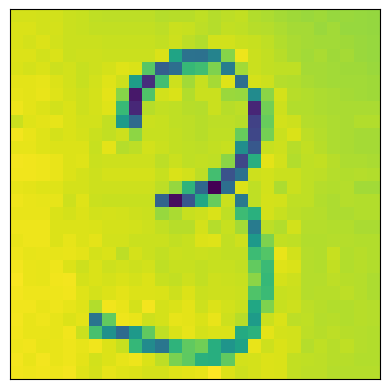

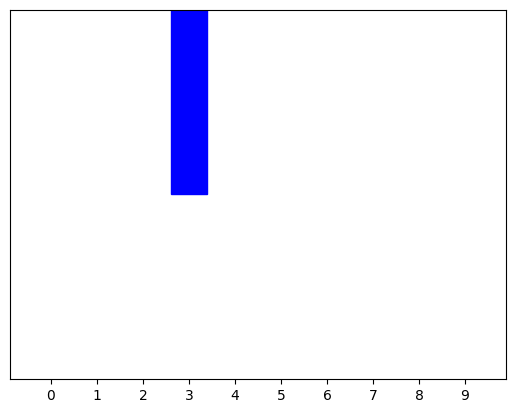

In [8]:
# Run the densely connected network to see its prediction for the image.
true_label = 3
p_arr = predict_image(model, x)
plot_value_array(p_arr, true_label, 1)

Predicted Label:  3


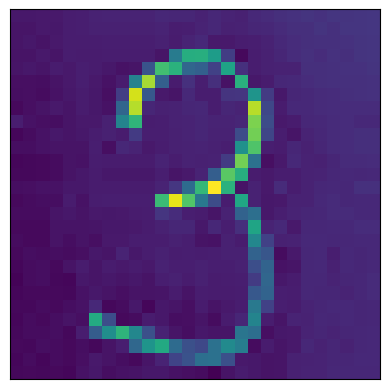

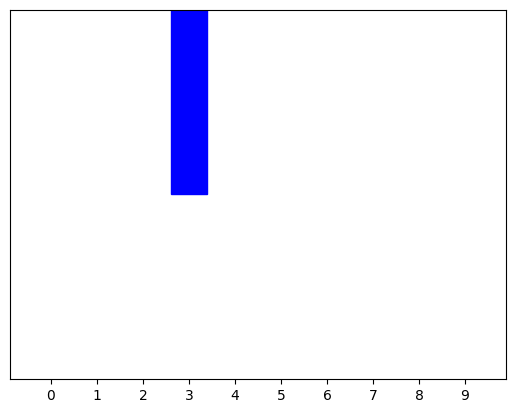

In [9]:
# Re-run the network to see the colors inverted.
x_inv = 255-x
arr = predict_image(model, x_inv)
plot_value_array(arr, 3, 1)

# Data Preparation and Fixing the Flaws
The network can correctly predict images, but only in a very specific set of parameters. Since all of the training images are white drawings with black backgrounds, when the network tries to guess what an image with a white background is, it has a much harder time making conclusions.

For the next part, you'll invert *some* of the training data so that the network is able to practice on both white backgrounds and black backgrounds.

In [10]:
# Create variables to keep track of the number rows and columns for each image.
img_rows, img_cols = 28, 28

In [11]:
# Create a variable to keep track of the number of output classes.
num_classes = 10

In [12]:
# Load the train and test data, and a backup of each.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()

In [13]:
# Print the shape to confirm it's the right data.
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
# Reshape the training and test data by converting the list of pixels into a 28x28 grid.
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

In [15]:
# Create an input_shape variable to keep track of the data's shape.
input_shape = (img_rows, img_cols, 1)

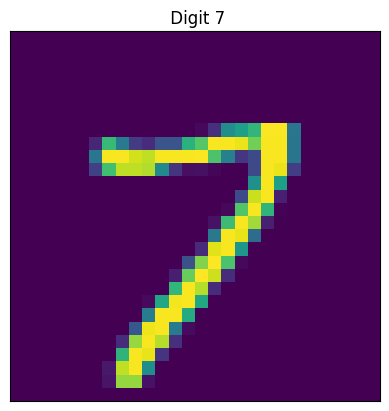

0 255


In [16]:
# Call the plot_image function to print out the 3001 image in train_images.
plot_image(train_images, 30001, train_labels)
# Call the show_min_max function to display the min and max values of the image. 
show_min_max(train_images, 30001)

In [17]:
# Invert the training data for the network to practice on white backgrounds and black backgrounds.
train_images[30000:]=255-train_images[30000:]

In [18]:
# Change the image values to between 0 and 1, convert that training and test data into float32.
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [19]:
# Divide the images by 255 to make sure that each pixel is stored as a value between 0 and 1.
train_images /= 255
test_images /= 255

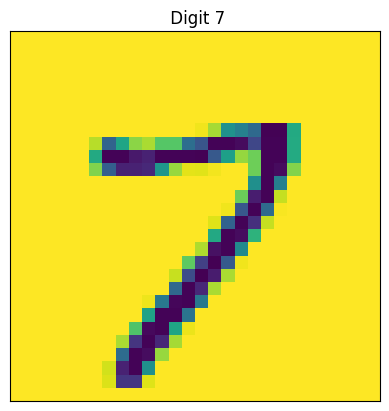

0.0 1.0


In [20]:
# With the adjusted data, call the plot_image function to print out the 3001 image in train_images.
plot_image(train_images, 30001, train_labels)
# with the adjusted data, call the show_min_max function to display the min and max values of the image. 
show_min_max(train_images, 30001)

In [21]:
# Employ one-hot encoding on your training labels.
train_labels = keras.utils.to_categorical (train_labels, num_classes)
#Employ one-hot encoding on your test labels.
test_labels = keras.utils.to_categorical (test_labels, num_classes)

# Re-training the Network
Now that you've prepared your data again and fixed the flaws, you'll re-train your network by importing the sequential model and adding the layers.

## Import Model and Layers

In [22]:
# Import the Sequential model.
from tensorflow.keras.models import Sequential
#Import the Dense and Flatten layers.
from tensorflow.keras.layers import Dense, Flatten

In [23]:
# Create a variable called epochs and set the value as 10.
epochs = 10
# Create a new model object called model_inv using the Keras Sequential command. 
model_inv = Sequential()
# Add a Flatten layer and pass the input shape as an argument.
model_inv.add(Flatten(input_shape=input_shape))
# Add a Dense layer to your network with the size of the layers in neurons and relu as the activation function. 
model_inv.add(Dense(16, activation='relu'))
# Add an output layer
model_inv.add(Dense(10, activation='softmax'))
# Print a summary of your network so far. 
model_inv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the Network

In [24]:
# Add the compile function that calculates the loss and uses the optimizer parameter to set the optimization algorithm.
model_inv.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

## Training

In [25]:
# Add the fit function and set the input data for this model so the network doesn't rely on a pattern to learn.
model_inv.fit(train_images, train_labels, epochs=epochs)

Epoch 1/10


1875/1875 [==============================] - 3s 2ms/step - loss: 1.3259 - accuracy: 0.5086
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0727 - accuracy: 0.5679
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0258 - accuracy: 0.5818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9997 - accuracy: 0.5929
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9806 - accuracy: 0.5998
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9671 - accuracy: 0.6074
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8960 - accuracy: 0.6479
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7959 - accuracy: 0.6976
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7299 - accuracy: 0.7319
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6

## Analyzing the Output

In [26]:
# Calculate the loss and accuracy of your model.
test_loss, test_acc = model_inv.evaluate(test_images, test_labels, verbose=2)
# Print out the test accuracy.
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.2306 - accuracy: 0.9321 - 497ms/epoch - 2ms/step

Test accuracy: 0.9320999979972839


# Testing your Network
With your network trained, you'll test the network and print a graph and a list with the predicted ranges.

Predicted Label:  8


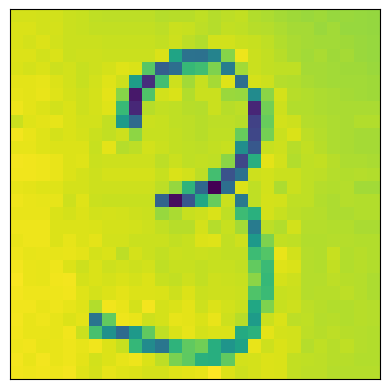

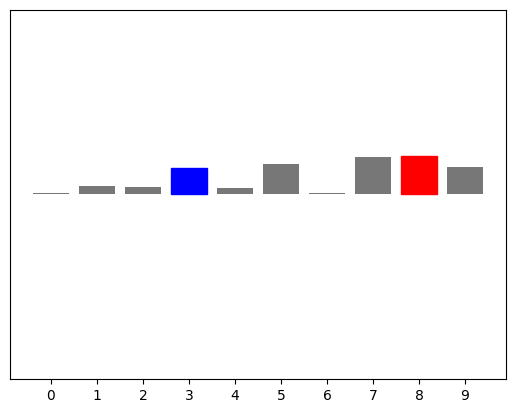

[[0.01022986 0.04418316 0.03790085 0.14136048 0.03266597 0.16430844
  0.00719206 0.20526843 0.21036156 0.14652915]]


In [27]:
# Create a variable called arr to hold the network's predicted value.
arr = predict_image(model_inv, x)

# Plot the predicted values to a graph.
plot_value_array(arr, 3, 1)

# Print the list with the predicted values.
print(arr)

# Exporting your Model
Finally, you'll export your model and save it.


In [28]:
# Export your model.
model_inv.save('Image_Recognizer/my_model_inv.h5')

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
